In [1]:
#Libraries for Machine Learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fall = pd.read_csv('Dataset/Fall.csv', header = None)
non_fall = pd.read_csv('Dataset/NonFall.csv', header = None)
rest = pd.read_csv('Dataset/Rest.csv', header = None)

fall[0] = 1
non_fall[0] = 2
rest[0] = 3

fin = pd.concat([fall,non_fall,rest])
fin = fin.sample(frac = 1)

In [3]:
x_inp = fin.iloc[:,1:].values
y_inp = fin.iloc[:,0].values

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_inp, y_inp, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
from matplotlib.colors import ListedColormap

def LDA_Plot(x_val, y_val, x_test, y_test, func, step = 0.01, title = "Title", dpi = 800):
    plt.figure(dpi = dpi)
    
    x_set, y_set = x_val, y_val
    #To get a meshgrid for plotting on contour
    x1, x2 = np.meshgrid( np.arange(start = x_set[:,0].min() - 1, stop = x_set[:,0].max() + 1, step = step),
                          np.arange(start = x_set[:,1].min() - 1, stop = x_set[:,1].max() + 1, step = step))
    #Plotting on the contour
    Z = func(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
    plt.contourf(x1, x2, Z,
                 cmap = ListedColormap(('red', 'green', 'blue')), alpha = 0.75)
    #Limiting the plot to max & min units of x1 & x2
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    plt.title("Decision Boundary - " + title)
    plt.savefig("Snips\\Decision Boundary - " + title)
    plt.show()
    
    plt.figure(dpi = dpi)
    
    plt.contourf(x1, x2, Z,
                 cmap = ListedColormap(('red', 'green', 'blue')), alpha = 0.75)
    #Limiting the plot to max & min units of x1 & x2
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    #Scatter plot of y_val
    for i, j in enumerate(np.unique(y_test)):
        plt.scatter(x_test[y_test==j, 0], x_test[y_test==j, 1], 
                    color = ListedColormap(("#8B0000", 'green', '#0000A0'))(i), label= j, s = 0.5) #Dark Red & Blue for clear visibility
    plt.title( "Scatter Plot on Decision Boundary - " + title)
    plt.legend()
    plt.savefig("Snips\\Scatter Plot on Decision Boundary - " + title)
    plt.show()

In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_train, y_train)

y_pred = classifier_NB.predict(x_train)

In [9]:
#Confusion Matrix & Accuracy for evaluating the model for training data

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Train Data): \n", cm)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy (Train Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Train Data): 
 [[5431 4294    0]
 [ 564 9112    0]
 [   0    0 9345]]
Accuracy (Train Data): 83.10 %


In [10]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Train Data: ", sen[0])
print("Sensitivity of Non-Fall for Train Data: ", sen[1])
print("Sensitivity of Rest for Train Data: ", sen[2])
print("Sensitivity of Train Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Train Data: ", spec[0] )
print("Specificity of Non-Fall for Train Data: ",  spec[1] )
print("Specificity of Rest for Train Data: ",  spec[2])
print("Specificity of Train Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Train Data:  0.9059216013344453
Sensitivity of Non-Fall for Train Data:  0.6796956586603013
Sensitivity of Rest for Train Data:  1.0
Sensitivity of Train Data:  86.18724199982489 %
Specificity of Fall for Train Data:  0.8112610434706167
Specificity of Non-Fall for Train Data:  0.9632333767926988
Specificity of Rest for Train Data:  0.7496005360548426
Specificity of Train Data:  84.1364985439386 %


In [11]:
# Confusion Matrix & Accuracy for evaluating the model for test data

y_pred = classifier_NB.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Test Data): 
 [[1844 1399    0]
 [ 188 3056    0]
 [   0    0 3095]]
Accuracy (Test Data): 83.44 %


In [12]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Test Data: ", sen[0])
print("Sensitivity of Non-Fall for Test Data: ", sen[1])
print("Sensitivity of Rest for Test Data: ", sen[2])
print("Sensitivity of Test Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Test Data: ", spec[0] )
print("Specificity of Non-Fall for Test Data: ",  spec[1] )
print("Specificity of Rest for Test Data: ",  spec[2])
print("Specificity of Test Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Test Data:  0.90748031496063
Sensitivity of Non-Fall for Test Data:  0.6859708193041526
Sensitivity of Rest for Test Data:  1.0
Sensitivity of Test Data:  86.4483711421594 %
Specificity of Fall for Test Data:  0.8147019867549669
Specificity of Non-Fall for Test Data:  0.9633313828749757
Specificity of Rest for Test Data:  0.7553568675813165
Specificity of Test Data:  84.4463412403753 %


In [13]:
# 10_Fold CV accuracy

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_NB, X=x_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 83.16 %
Std of Accuracies:  0.0037688520861990935


In [14]:
# Checking the optimal value of k such that, good amount of variance is retained
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)
explained_variance = lda.explained_variance_ratio_

# explained_variance gives us the non-cummulative value of the varaince retained
variance_retained = 0

# Finding the variance retained for decrease in principal components
for k, evr in enumerate(explained_variance):
    variance_retained += evr 
    print("No. of Principal Components: ", k, " Explained Variance Ratio: {:.4f}".format(evr), " Variance Retained: {:.2f} %".format(variance_retained*100))
    if (variance_retained >= 0.98):
        # Finding the smallest value of k such that 98% of the variance is reatined
        break

No. of Principal Components:  0  Explained Variance Ratio: 0.8777  Variance Retained: 87.77 %
No. of Principal Components:  1  Explained Variance Ratio: 0.1223  Variance Retained: 100.00 %


In [15]:
# Choosing k, such that 98% of the variance is reatined.
# But, here even for k = 1, 100% variance is retained. So, for better data visualisation k=2 is chosen
lda = LDA(n_components=2)
# Transforming z_train & z_test using the new reduced dimension vector (U_reduce)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)

In [16]:
# Analysing the SVM model fit with z_train
classifier_z = GaussianNB()
classifier_z.fit(z_train, y_train)
y_z_pred = classifier_z.predict(z_train)

In [17]:
cm = confusion_matrix(y_z_pred, y_train)
print("Confustion Matrix (Z-Train Data): \n", cm)
accuracy = accuracy_score(y_train, y_z_pred)
print("Accuracy (Z-Train Data): {:.2f} %".format(accuracy*100))

Confustion Matrix (Z-Train Data): 
 [[4892  549    0]
 [4823 9126    0]
 [  10    1 9345]]
Accuracy (Z-Train Data): 81.27 %


In [18]:
y_z_pred = classifier_z.predict(z_test)

cm = confusion_matrix(y_test, y_z_pred)
print("Confusion Matrix (Z-Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_z_pred)
print("Accuracy (Z-Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Z-Test Data): 
 [[1654 1587    2]
 [ 199 3044    1]
 [   0    0 3095]]
Accuracy (Z-Test Data): 81.33 %


In [19]:
# 10_Fold CV accuracy

z_inp = lda.transform(x_inp)

accuracies = cross_val_score(estimator=classifier_z, X=z_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 79.38 %
Std of Accuracies:  0.0030465430155389717


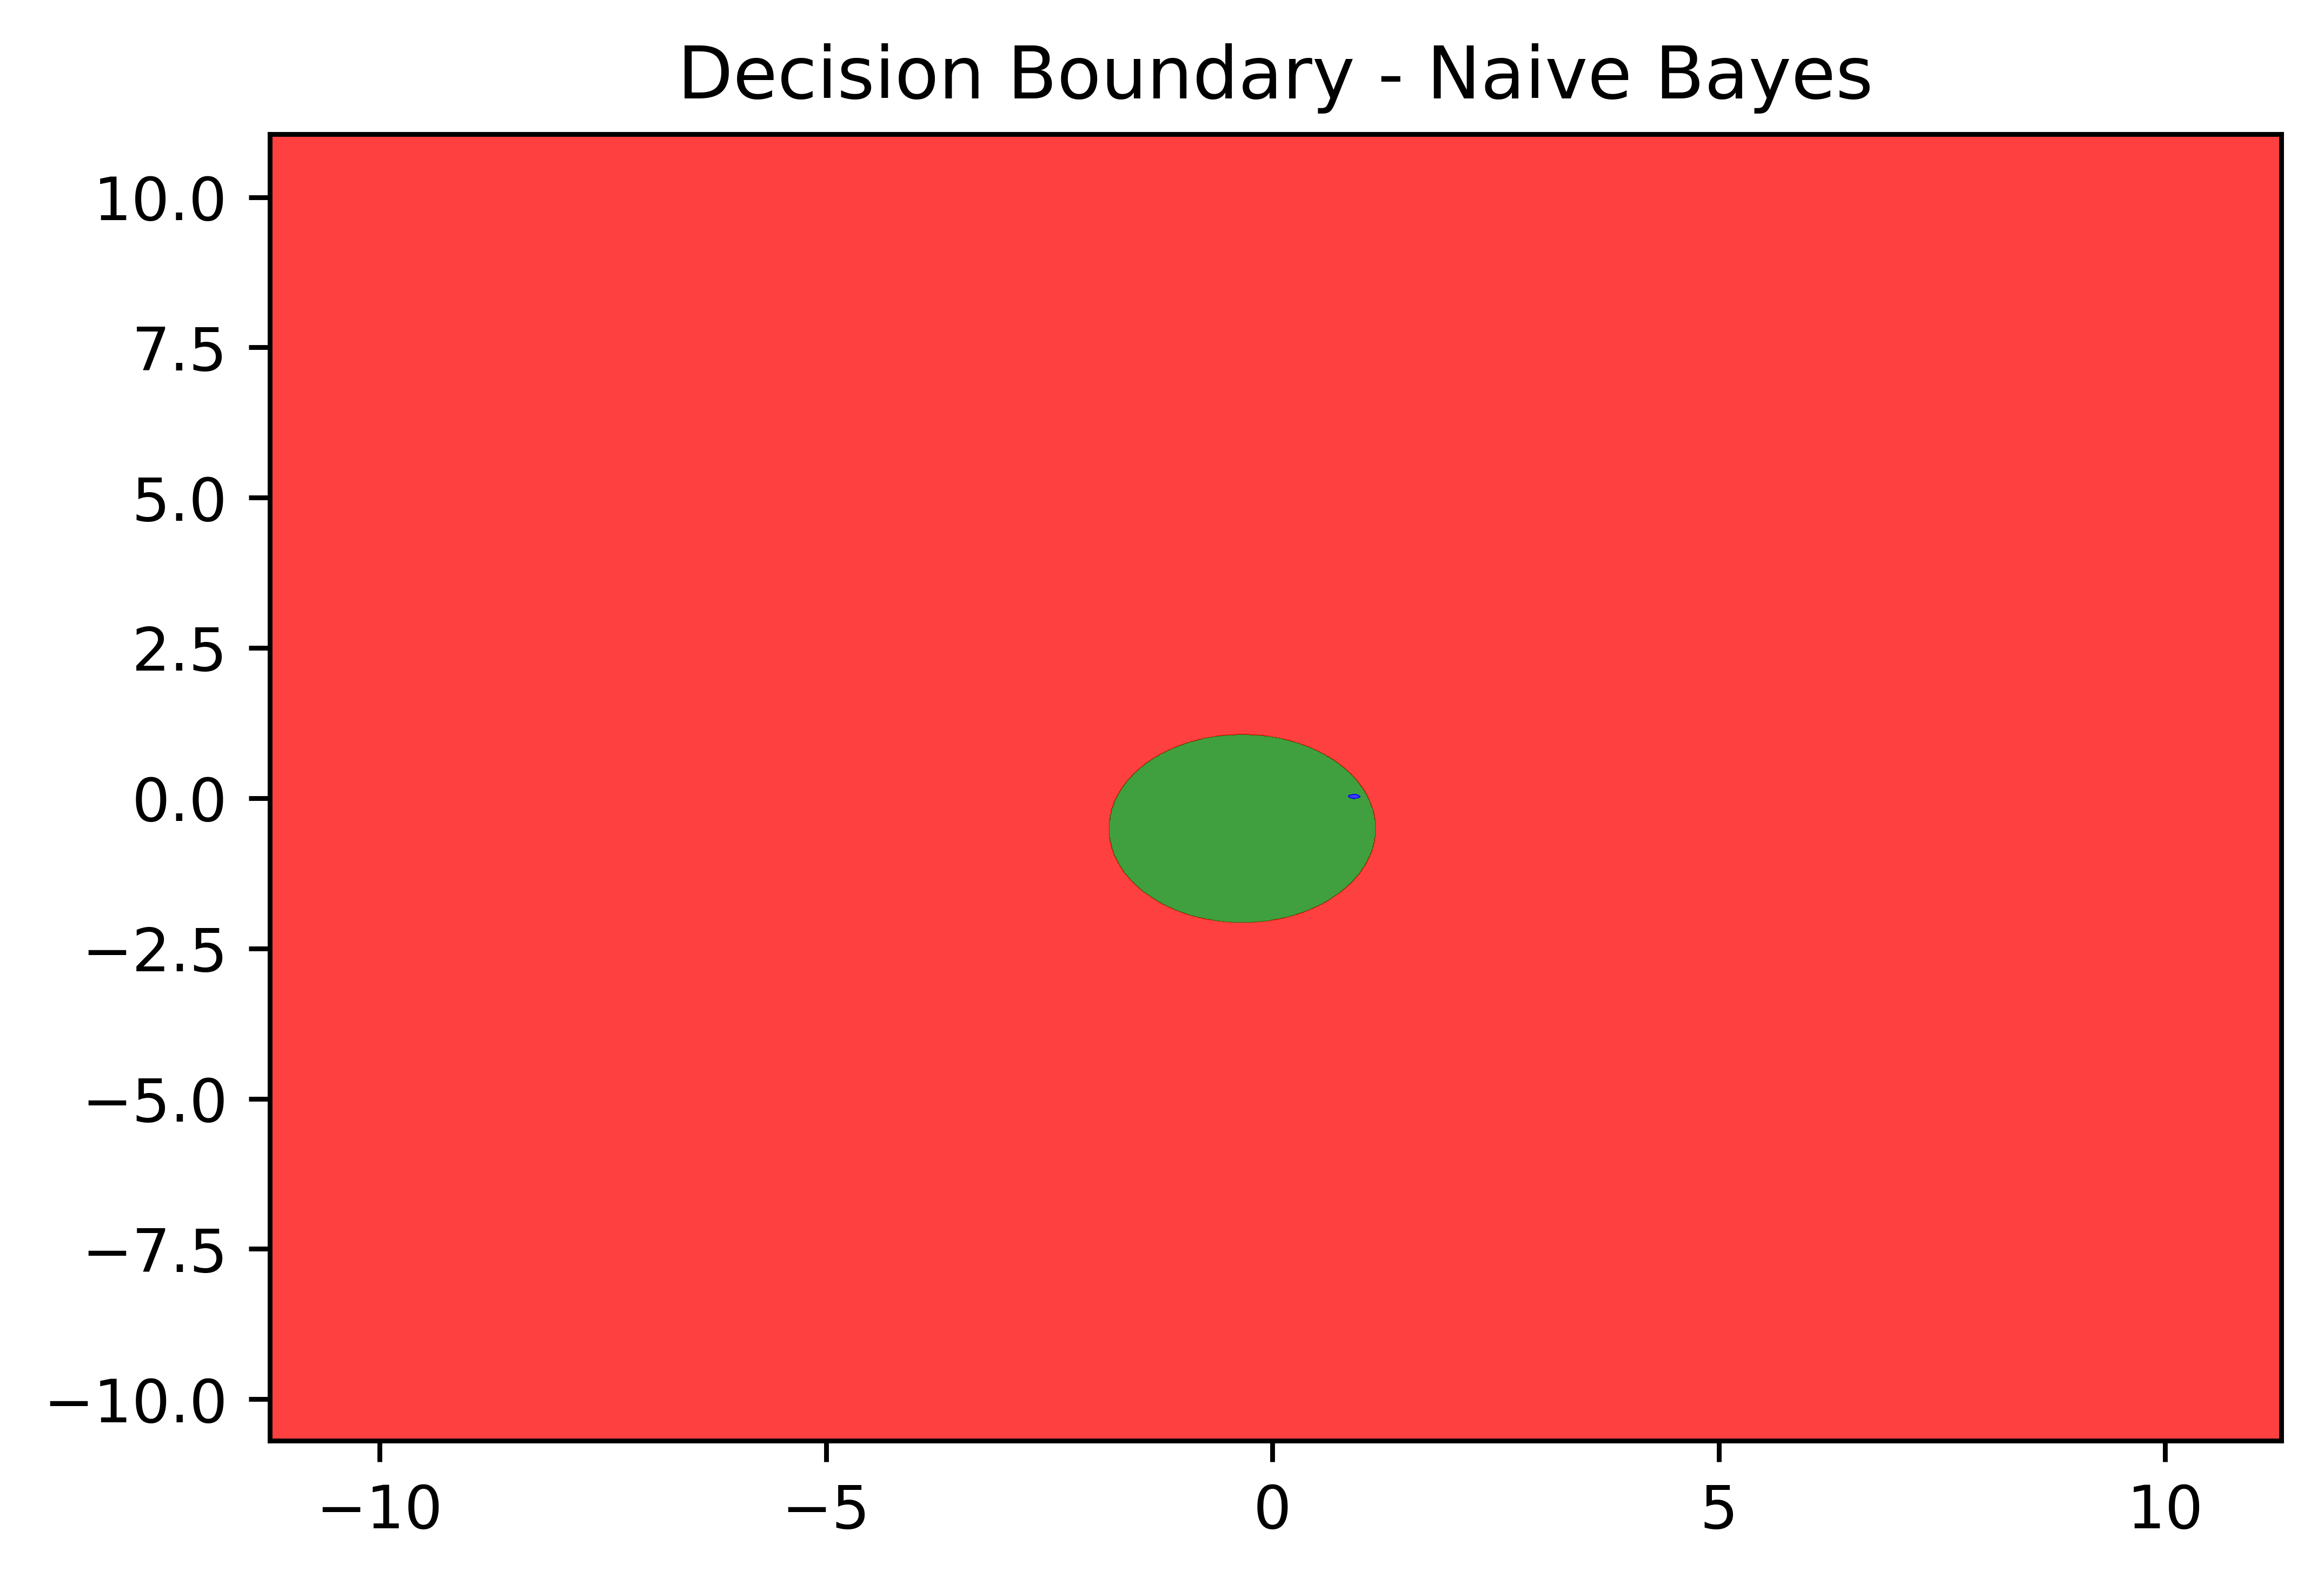

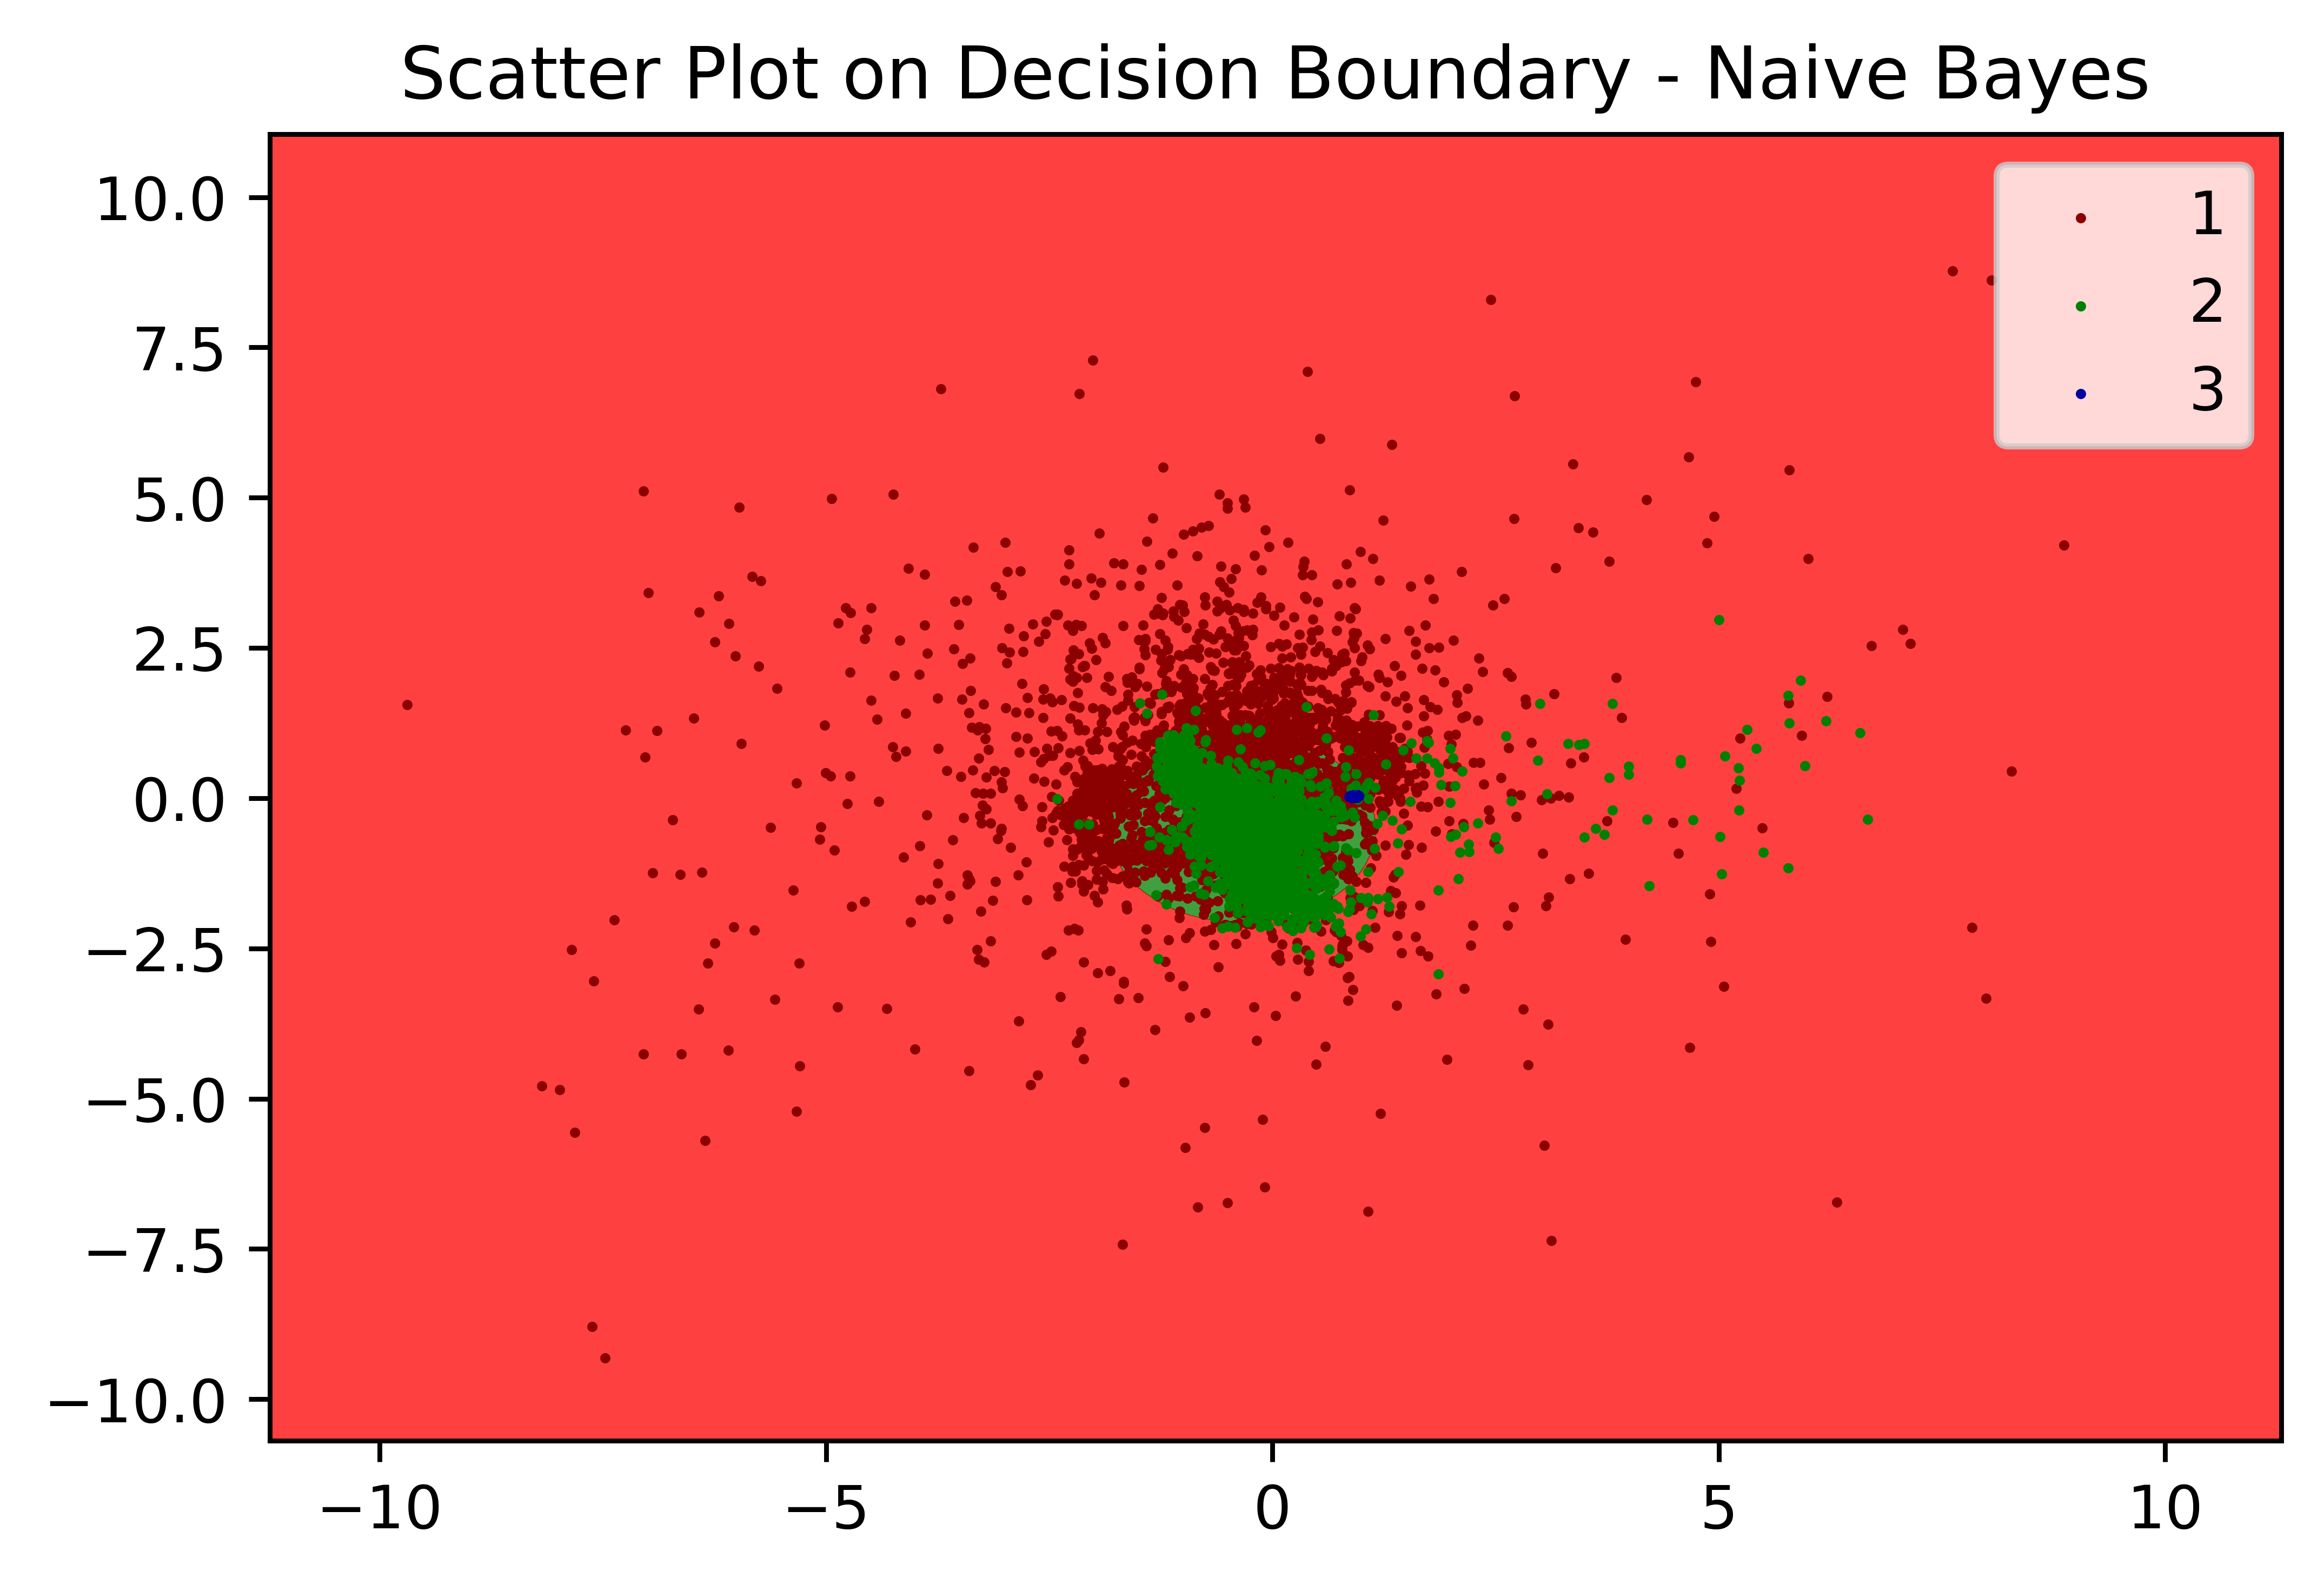

In [20]:
LDA_Plot(z_train, y_train, z_test, y_test, func = classifier_z.predict ,title = "Naive Bayes", dpi = 800)

## Decision Tree Classification

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion='entropy', min_samples_split = 100, min_samples_leaf = 80, random_state=0)
classifier_DT.fit(x_train, y_train)

y_pred = classifier_DT.predict(x_train)

In [22]:
#Confusion Matrix & Accuracy for evaluating the model for training data

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Train Data): \n", cm)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy (Train Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Train Data): 
 [[9189  531    5]
 [ 795 8880    1]
 [  24    0 9321]]
Accuracy (Train Data): 95.28 %


In [23]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Train Data: ", sen[0])
print("Sensitivity of Non-Fall for Train Data: ", sen[1])
print("Sensitivity of Rest for Train Data: ", sen[2])
print("Sensitivity of Train Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Train Data: ", spec[0] )
print("Specificity of Non-Fall for Train Data: ",  spec[1] )
print("Specificity of Rest for Train Data: ",  spec[2])
print("Specificity of Train Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Train Data:  0.9181654676258992
Sensitivity of Non-Fall for Train Data:  0.9435766656040804
Sensitivity of Rest for Train Data:  0.9993567063364426
Sensitivity of Train Data:  95.36996131888073 %
Specificity of Fall for Train Data:  0.9713416586615434
Specificity of Non-Fall for Train Data:  0.9573312645461598
Specificity of Rest for Train Data:  0.9304804572841032
Specificity of Train Data:  95.30511268306022 %


In [24]:
# Confusion Matrix & Accuracy for evaluating the model for test data

y_pred = classifier_DT.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Test Data): 
 [[3041  200    2]
 [ 306 2938    0]
 [  11    0 3084]]
Accuracy (Test Data): 94.58 %


In [25]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Test Data: ", sen[0])
print("Sensitivity of Non-Fall for Test Data: ", sen[1])
print("Sensitivity of Rest for Test Data: ", sen[2])
print("Sensitivity of Test Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Test Data: ", spec[0] )
print("Specificity of Non-Fall for Test Data: ",  spec[1] )
print("Specificity of Rest for Test Data: ",  spec[2])
print("Specificity of Test Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Test Data:  0.9055985705777249
Sensitivity of Non-Fall for Test Data:  0.9362651370299554
Sensitivity of Rest for Test Data:  0.9993519118600129
Sensitivity of Test Data:  94.70718731558976 %
Specificity of Fall for Test Data:  0.9675449871465296
Specificity of Non-Fall for Test Data:  0.9504965859714463
Specificity of Rest for Test Data:  0.9204125615763546
Specificity of Test Data:  94.61513782314435 %


In [26]:
# 10_Fold CV accuracy

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_DT, X=x_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 95.23 %
Std of Accuracies:  0.002311978304846531


In [27]:
# Checking the optimal value of k such that, good amount of variance is retained
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)
explained_variance = lda.explained_variance_ratio_

# explained_variance gives us the non-cummulative value of the varaince retained
variance_retained = 0

# Finding the variance retained for decrease in principal components
for k, evr in enumerate(explained_variance):
    variance_retained += evr 
    print("No. of Principal Components: ", k, " Explained Variance Ratio: {:.4f}".format(evr), " Variance Retained: {:.2f} %".format(variance_retained*100))
    if (variance_retained >= 0.98):
        # Finding the smallest value of k such that 98% of the variance is reatined
        break

No. of Principal Components:  0  Explained Variance Ratio: 0.8777  Variance Retained: 87.77 %
No. of Principal Components:  1  Explained Variance Ratio: 0.1223  Variance Retained: 100.00 %


In [28]:
# Choosing k, such that 98% of the variance is reatined.
# But, here even for k = 1, 100% variance is retained. So, for better data visualisation k=2 is chosen
lda = LDA(n_components=2)
# Transforming z_train & z_test using the new reduced dimension vector (U_reduce)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)

In [29]:
# Analysing the SVM model fit with z_train
classifier_z = DecisionTreeClassifier(criterion='entropy', min_samples_split = 100, min_samples_leaf = 80, random_state=0)
classifier_z.fit(z_train, y_train)
y_z_pred = classifier_z.predict(z_train)

In [30]:
cm = confusion_matrix(y_z_pred, y_train)
print("Confustion Matrix (Z-Train Data): \n", cm)
accuracy = accuracy_score(y_train, y_z_pred)
print("Accuracy (Z-Train Data): {:.2f} %".format(accuracy*100))

Confustion Matrix (Z-Train Data): 
 [[7769 1020    2]
 [1949 8655    0]
 [   7    1 9343]]
Accuracy (Z-Train Data): 89.64 %


In [31]:
y_z_pred = classifier_z.predict(z_test)

cm = confusion_matrix(y_test, y_z_pred)
print("Confusion Matrix (Z-Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_z_pred)
print("Accuracy (Z-Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Z-Test Data): 
 [[2556  685    2]
 [ 344 2899    1]
 [   3    0 3092]]
Accuracy (Z-Test Data): 89.20 %


In [32]:
# 10_Fold CV accuracy

z_inp = lda.transform(x_inp)

accuracies = cross_val_score(estimator=classifier_z, X=z_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 86.99 %
Std of Accuracies:  0.004155130554821554


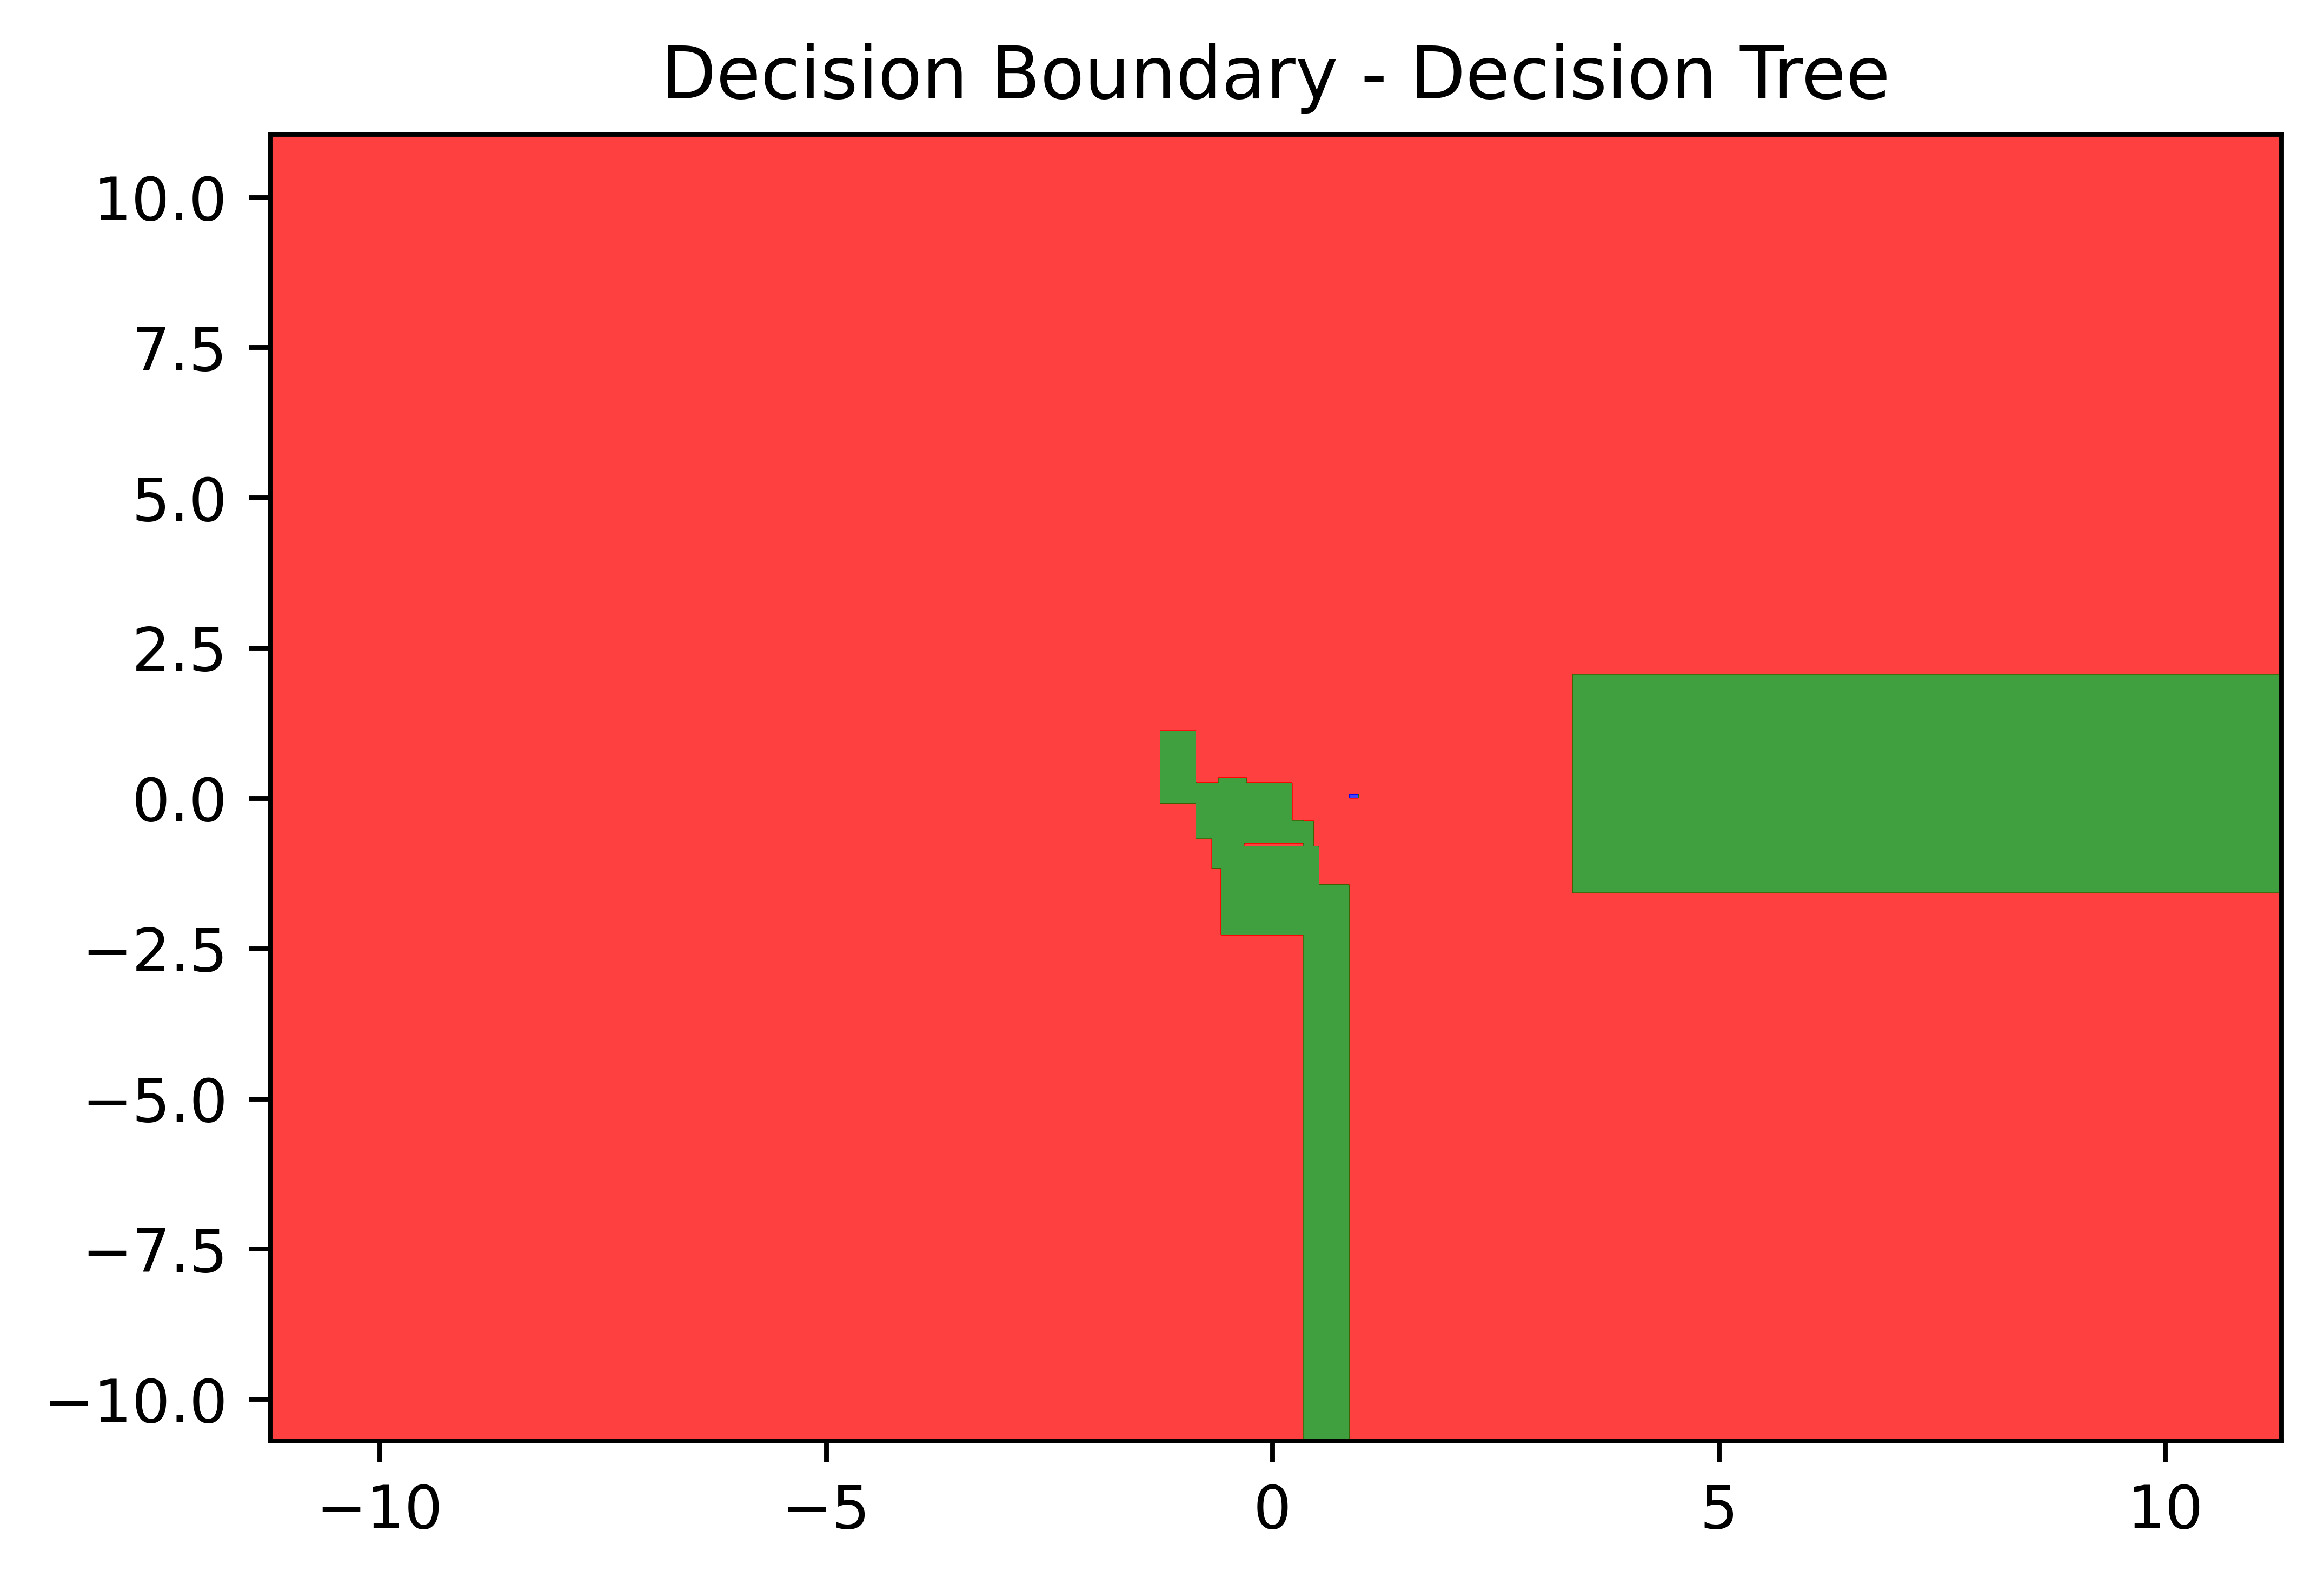

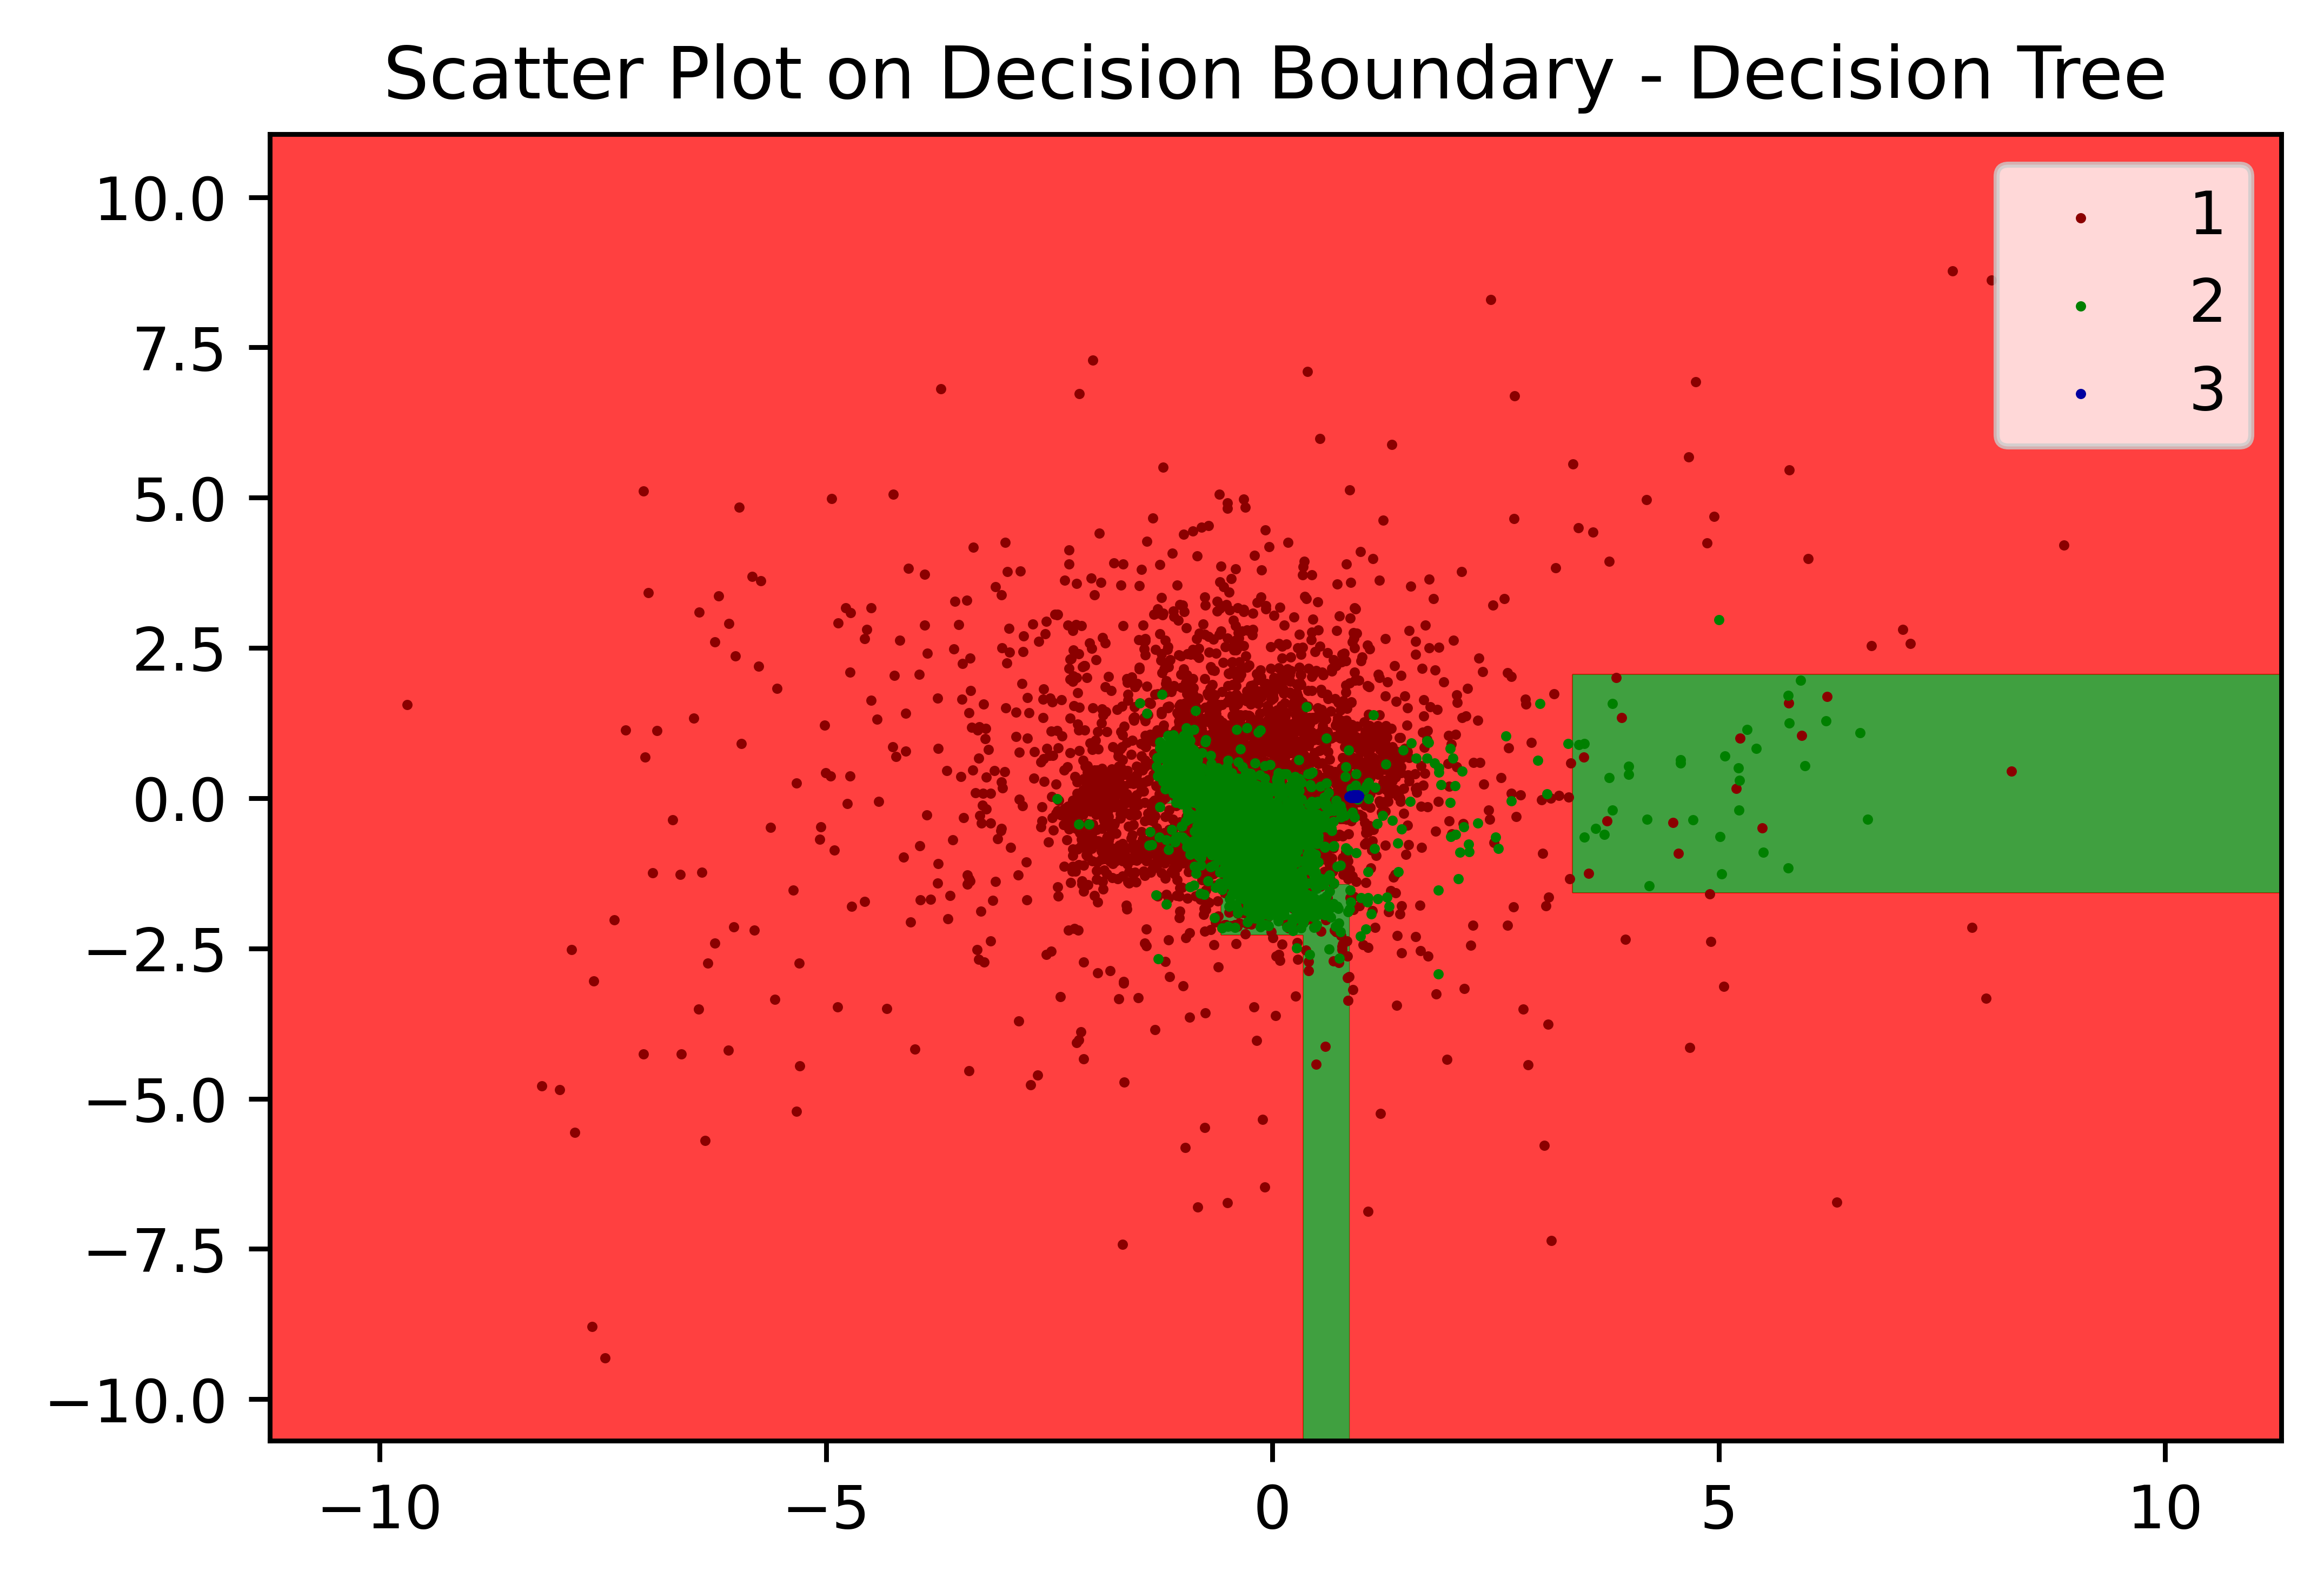

In [33]:
LDA_Plot(z_train, y_train, z_test, y_test, func = classifier_z.predict ,title = "Decision Tree")

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=120, min_samples_split = 80, min_samples_leaf = 80, criterion='entropy')
classifier_RF.fit(x_train, y_train)

y_pred = classifier_RF.predict(x_train)

In [35]:
#Confusion Matrix & Accuracy for evaluating the model for training data

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Train Data): \n", cm)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy (Train Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Train Data): 
 [[9242  482    1]
 [ 634 9042    0]
 [   1    0 9344]]
Accuracy (Train Data): 96.11 %


In [36]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Train Data: ", sen[0])
print("Sensitivity of Non-Fall for Train Data: ", sen[1])
print("Sensitivity of Rest for Train Data: ", sen[2])
print("Sensitivity of Train Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Train Data: ", spec[0] )
print("Specificity of Non-Fall for Train Data: ",  spec[1] )
print("Specificity of Rest for Train Data: ",  spec[2])
print("Specificity of Train Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Train Data:  0.9357092234484156
Sensitivity of Non-Fall for Train Data:  0.9493910121797564
Sensitivity of Rest for Train Data:  0.9998929909042269
Sensitivity of Train Data:  96.16644088441329 %
Specificity of Fall for Train Data:  0.9744024590598336
Specificity of Non-Fall for Train Data:  0.9669129122880034
Specificity of Rest for Train Data:  0.9424256481624659
Specificity of Train Data:  96.12470065034343 %


In [37]:
# Confusion Matrix & Accuracy for evaluating the model for test data

y_pred = classifier_RF.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Test Data): 
 [[3065  178    0]
 [ 230 3014    0]
 [   1    0 3094]]
Accuracy (Test Data): 95.73 %


In [38]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Test Data: ", sen[0])
print("Sensitivity of Non-Fall for Test Data: ", sen[1])
print("Sensitivity of Rest for Test Data: ", sen[2])
print("Sensitivity of Test Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Test Data: ", spec[0] )
print("Specificity of Non-Fall for Test Data: ",  spec[1] )
print("Specificity of Rest for Test Data: ",  spec[2])
print("Specificity of Test Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Test Data:  0.9299150485436893
Sensitivity of Non-Fall for Test Data:  0.9442355889724311
Sensitivity of Rest for Test Data:  1.0
Sensitivity of Test Data:  95.80502125053735 %
Specificity of Fall for Test Data:  0.9716831053133949
Specificity of Non-Fall for Test Data:  0.963849765258216
Specificity of Rest for Test Data:  0.936960542540074
Specificity of Test Data:  95.74978043705616 %


In [39]:
# 10_Fold CV accuracy

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_RF, X=x_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 96.01 %
Std of Accuracies:  0.002150270836509598


In [40]:
# Checking the optimal value of k such that, good amount of variance is retained
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)
explained_variance = lda.explained_variance_ratio_

# explained_variance gives us the non-cummulative value of the varaince retained
variance_retained = 0

# Finding the variance retained for decrease in principal components
for k, evr in enumerate(explained_variance):
    variance_retained += evr 
    print("No. of Principal Components: ", k, " Explained Variance Ratio: {:.4f}".format(evr), " Variance Retained: {:.2f} %".format(variance_retained*100))
    if (variance_retained >= 0.98):
        # Finding the smallest value of k such that 98% of the variance is reatined
        break

No. of Principal Components:  0  Explained Variance Ratio: 0.8777  Variance Retained: 87.77 %
No. of Principal Components:  1  Explained Variance Ratio: 0.1223  Variance Retained: 100.00 %


In [41]:
# Choosing k, such that 98% of the variance is reatined.
# But, here even for k = 1, 100% variance is retained. So, for better data visualisation k=2 is chosen
lda = LDA(n_components=2)
# Transforming z_train & z_test using the new reduced dimension vector (U_reduce)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)

In [42]:
# Analysing the SVM model fit with z_train
classifier_z = RandomForestClassifier(n_estimators=120, min_samples_split = 80, min_samples_leaf = 80, criterion='entropy')
classifier_z.fit(z_train, y_train)
y_z_pred = classifier_z.predict(z_train)

In [43]:
cm = confusion_matrix(y_z_pred, y_train)
print("Confustion Matrix (Z-Train Data): \n", cm)
accuracy = accuracy_score(y_train, y_z_pred)
print("Accuracy (Z-Train Data): {:.2f} %".format(accuracy*100))

Confustion Matrix (Z-Train Data): 
 [[7912 1110    0]
 [1803 8565    0]
 [  10    1 9345]]
Accuracy (Z-Train Data): 89.83 %


In [44]:
y_z_pred = classifier_z.predict(z_test)

cm = confusion_matrix(y_test, y_z_pred)
print("Confusion Matrix (Z-Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_z_pred)
print("Accuracy (Z-Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Z-Test Data): 
 [[2599  641    3]
 [ 386 2857    1]
 [   1    0 3094]]
Accuracy (Z-Test Data): 89.23 %


In [45]:
# 10_Fold CV accuracy

z_inp = lda.transform(x_inp)

accuracies = cross_val_score(estimator=classifier_z, X=z_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 87.23 %
Std of Accuracies:  0.0031293969938915233


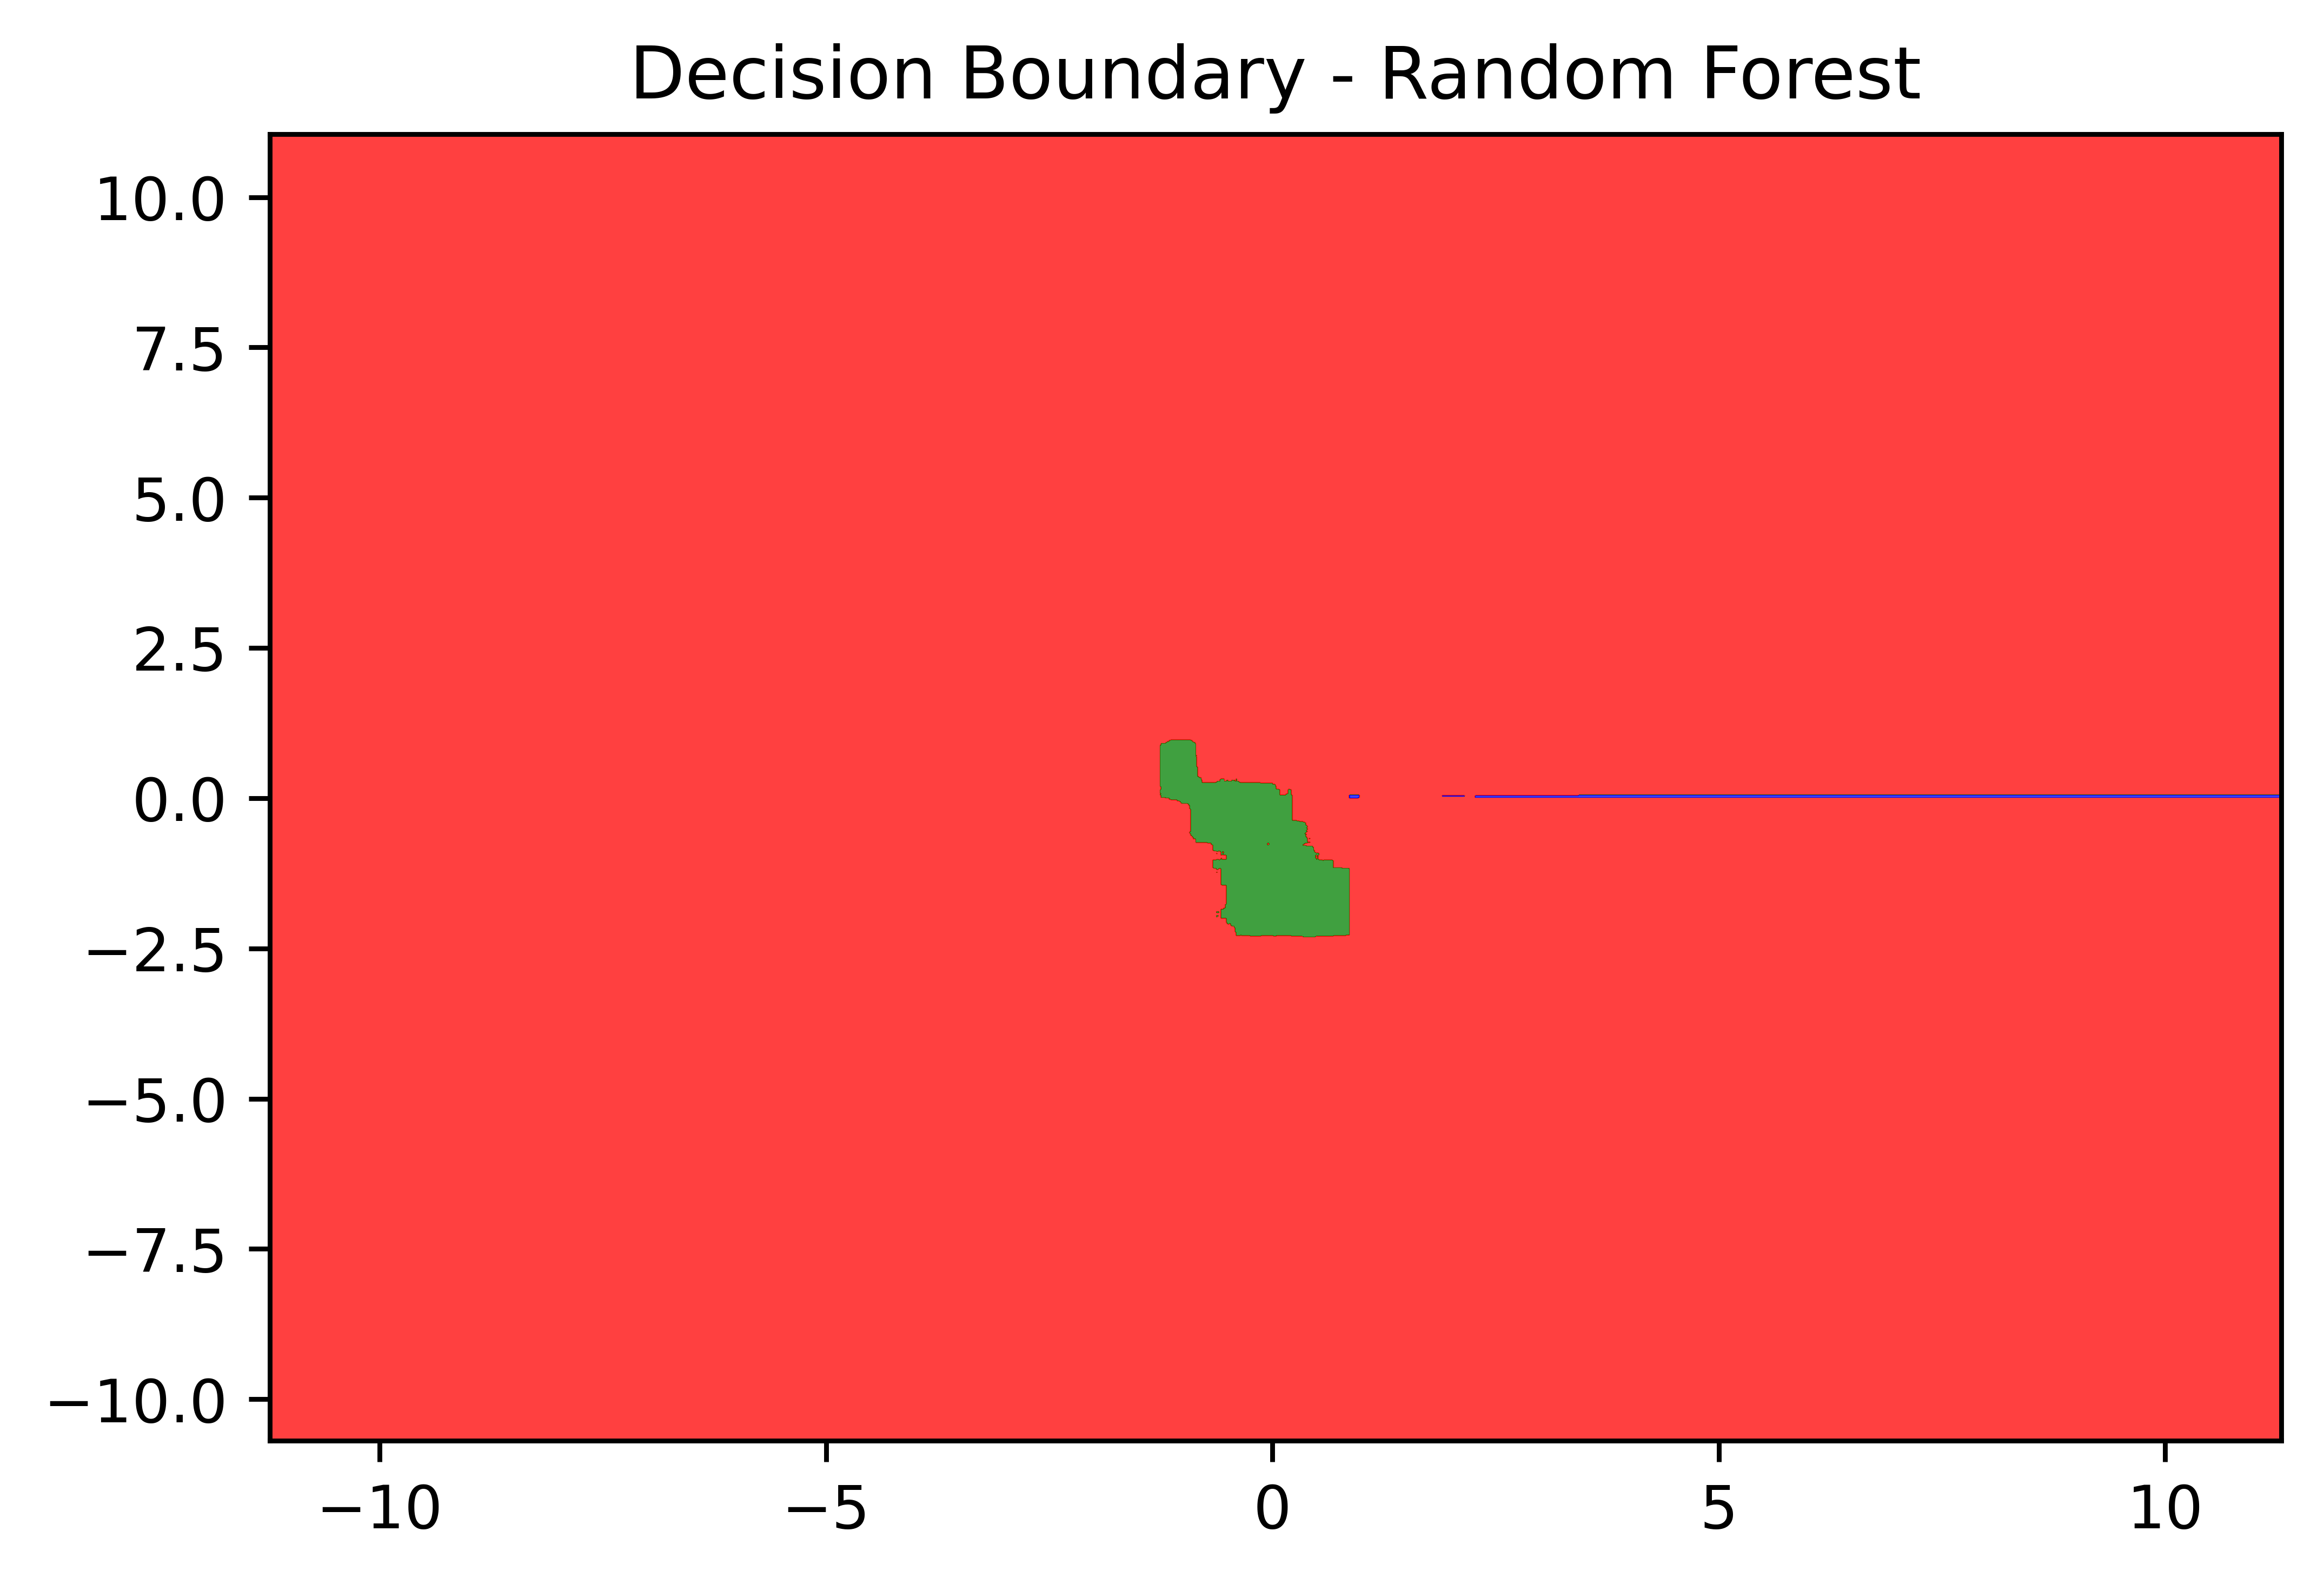

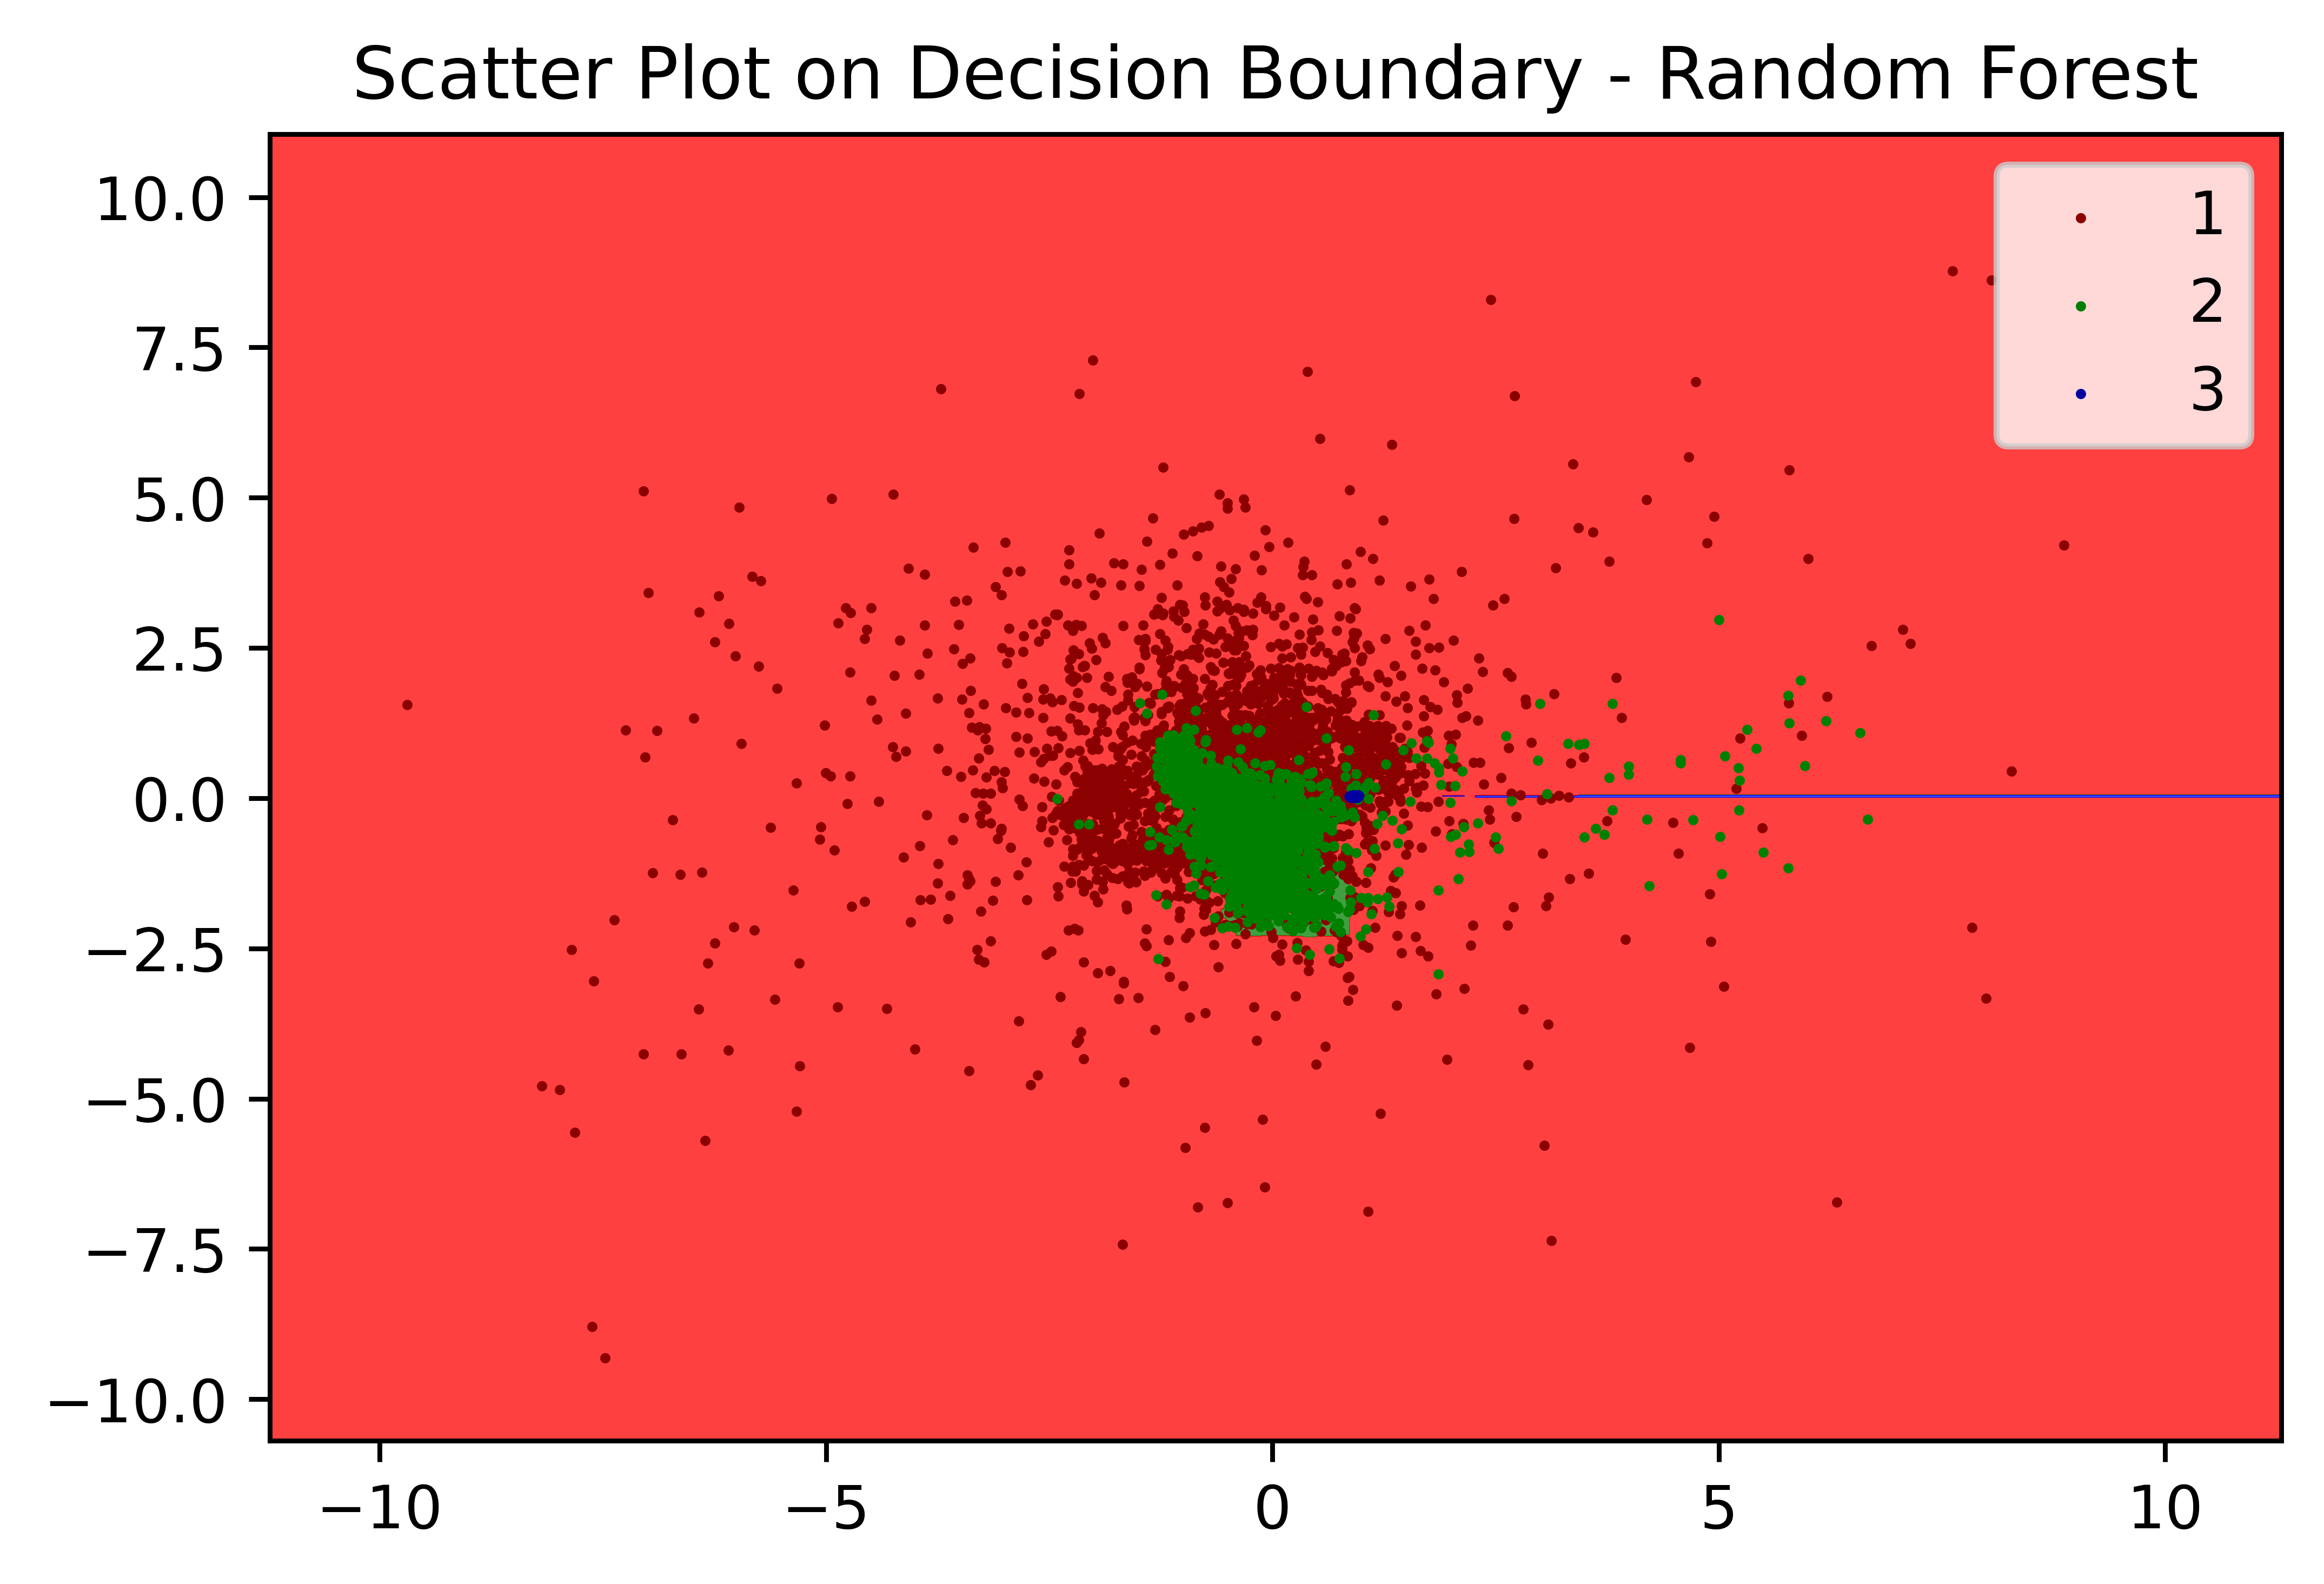

In [46]:
LDA_Plot(z_train, y_train, z_test, y_test, func = classifier_z.predict ,title = "Random Forest")